In [5]:
import random
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import time

#preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,MultiLabelBinarizer,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,mean_squared_error,r2_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier



In [6]:
#read data from files
df = pd.read_csv("data/patient_icd_rx_grouped.csv")
df.sample(10)

,PatientID,Age,Gender,BMI,Weight_kg,Height_cm,Chronic_Conditions,Symptoms,Diagnosis,Recommended_Medication,NDC,Dosage,Duration,Treatment_Effectiveness,Adverse_Reactions,Recovery_Time_Days
42942,438480,59,F,18.9,62.2,181.6,Nausea with vomiting,['Nausea'],787.01,Ondansetron,1730601,4mg,7 days,High,Fatigue,5
11256,121620,18,F,25.7,77.6,173.6,Asthma,['Wheezing'],493.90,Albuterol,748038,90mcg,7 days,High,Nausea,5
13478,143840,82,M,20.8,63.4,174.4,Insomnia,['Difficulty falling asleep'],780.52,Zolpidem,2282550,10mg,10 days,High,Nausea,5
25286,261920,74,F,16.4,46.3,167.9,Lumbago (lower back pain),"['Back pain, Limited movement, Stiffness']",724.20,Ibuprofen,5271402,200mg,5 days,Moderate,Nausea,10
15669,165750,81,M,34.5,87.8,159.5,Insomnia,"['Fatigue, Difficulty falling asleep, Restless...",780.52,Zolpidem,2282550,10mg,7 days,Moderate,NaN,10
28038,289440,57,F,27.4,82.2,173.2,Anemia,"['Fatigue, Pale skin']",285.90,Ferrous sulfate,1210649,325mg,10 days,Low,NaN,15
389,12950,79,F,17.5,51.5,171.5,Gastroesophageal reflux disease (GERD),"['Heartburn, Regurgitation, Chest discomfort']",530.81,Omeprazole,1730834,20mg,5 days,High,NaN,5
4794,57000,78,M,24.1,64.5,163.6,Depressive disorder,['Fatigue'],311.00,Fluoxetine,494900,20mg,7 days,High,Rash,5
38614,395200,40,M,26.0,71.3,165.7,Diarrhea,"['Abdominal cramps, Urgency to defecate']",787.91,Loperamide,5740397,2mg,10 days,High,NaN,5
7300,82060,54,F,33.5,90.3,164.3,Diarrhea,"['Abdominal cramps, Loose stools, Urgency to d...",787.91,Loperamide,5740397,2mg,10 days,Low,Rash,15


Exploratory Data Analysis

In [8]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PatientID                50094 non-null  int64  
 1   Age                      50094 non-null  int64  
 2   Gender                   50094 non-null  object 
 3   BMI                      50094 non-null  float64
 4   Weight_kg                50094 non-null  float64
 5   Height_cm                50094 non-null  float64
 6   Chronic_Conditions       50094 non-null  object 
 7   Symptoms                 50094 non-null  object 
 8   Diagnosis                50094 non-null  float64
 9   Recommended_Medication   50083 non-null  object 
 10  NDC                      50094 non-null  int64  
 11  Dosage                   50094 non-null  object 
 12  Duration                 50094 non-null  object 
 13  Treatment_Effectiveness  50094 non-null  object 
 14  Adverse_Reactions     

In [9]:
df.head(10)

,PatientID,Age,Gender,BMI,Weight_kg,Height_cm,Chronic_Conditions,Symptoms,Diagnosis,Recommended_Medication,NDC,Dosage,Duration,Treatment_Effectiveness,Adverse_Reactions,Recovery_Time_Days
0,10006,37,F,25.5,71.8,167.8,SEPSIS,Sepsis,99591.0,Glipizide,51079081120,10MG TAB,5 days,High,Nausea,5
1,10013,58,F,23.1,82.2,188.8,SEPSIS,Unspecified septicemia,389.0,Furosemide,74610204,40MG/4ML VIAL,14 days,High,Fatigue,5
2,10017,76,F,19.8,48.4,156.4,HUMERAL FRACTURE,Closed fracture of surgical neck of humerus,81201.0,Hydromorphone,74131230,2mg/mL Syringe,5 days,Moderate,Fatigue,10
3,10019,51,M,29.9,84.0,167.7,ALCOHOLIC HEPATITIS,Unspecified septicemia,389.0,Propofol,310030011,1000mg/100mL Vial,10 days,Moderate,NaN,10
4,10026,22,F,20.4,51.8,159.4,STROKE/TIA,Intracerebral hemorrhage,431.0,Metoprolol,55390007310,5mg/5mL Vial,7 days,Moderate,Nausea,10
5,10027,54,F,21.7,54.3,158.2,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\...,"Congestive heart failure, unspecified",4280.0,NaN,456066270,20mEq Packet,5 days,Moderate,Rash,10
6,10029,67,M,21.9,57.3,161.8,SYNCOPE;TELEMETRY,Streptococcal septicemia,380.0,NaN,338004904,1000mL Bag,5 days,High,NaN,5
7,10032,35,M,21.3,67.0,177.4,RIGHT HUMEROUS FRACTURE,Other closed fracture of lower end of humerus,81249.0,Prochlorperazine,7336721,10MG TAB,7 days,High,Nausea,5
8,10033,79,F,23.0,54.2,153.4,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA,Toxic multinodular goiter without mention of t...,24220.0,"Polystyrene, Sulfonate",46287000660,15g/60mL Bottle,14 days,Low,NaN,15
9,10035,40,M,22.2,67.3,174.3,"RECURRENT LEFT CAROTID STENOSIS,PRE HYDRATION",Occlusion and stenosis of carotid artery witho...,43310.0,Heparin,74779362,"25,000 unit Premix Bag",7 days,Moderate,Nausea,10


In [10]:
print(df.isnull().sum())

PatientID                      0
Age                            0
Gender                         0
BMI                            0
Weight_kg                      0
Height_cm                      0
Chronic_Conditions             0
Symptoms                       0
Diagnosis                      0
Recommended_Medication        11
NDC                            0
Dosage                         0
Duration                       0
Treatment_Effectiveness        0
Adverse_Reactions          24947
Recovery_Time_Days             0
dtype: int64


In [11]:
for col in df.columns:
    print(f"value counts for column '{col}':")
    print(df[col].value_counts(dropna=False))
    

value counts for column 'PatientID':
PatientID
10090     2
10120     2
42430     2
40310     2
43870     2
         ..
176150    1
176160    1
176170    1
176180    1
509990    1
Name: count, Length: 50088, dtype: int64
value counts for column 'Age':
Age
43    753
28    751
75    750
79    745
76    738
     ... 
71    655
49    650
31    648
81    636
87    631
Name: count, Length: 72, dtype: int64
value counts for column 'Gender':
Gender
M    25063
F    25031
Name: count, dtype: int64
value counts for column 'BMI':
BMI
22.5    375
23.3    356
23.9    353
25.6    350
23.1    350
       ... 
52.1      1
55.1      1
47.4      1
50.2      1
5.2       1
Name: count, Length: 447, dtype: int64
value counts for column 'Weight_kg':
Weight_kg
67.2     154
63.4     152
73.5     149
75.3     149
70.9     149
        ... 
24.8       1
23.9       1
112.6      1
113.2      1
27.3       1
Name: count, Length: 989, dtype: int64
value counts for column 'Height_cm':
Height_cm
170.5    227
171.3    221


In [12]:
df.describe()

,PatientID,Age,BMI,Weight_kg,Height_cm,Diagnosis,NDC,Recovery_Time_Days
count,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000,5.009400e+04,50094.000000
mean,259558.146604,53.424702,24.480826,70.025566,170.012399,631.112053,7.454888e+07,7.532439
std,144556.750799,20.724193,6.028929,14.990268,10.016197,1756.131832,1.354159e+09,3.369803
min,10000.000000,18.000000,3.700000,12.700000,125.200000,250.000000,2.459100e+05,5.000000
25%,134292.500000,36.000000,20.300000,59.900000,163.200000,401.900000,9.310480e+05,5.000000
50%,259525.000000,53.000000,24.200000,70.000000,170.000000,599.000000,1.730601e+06,5.000000
75%,384757.500000,71.000000,28.300000,80.100000,176.800000,780.600000,5.740397e+06,10.000000
max,509990.000000,89.000000,56.100000,134.500000,209.400000,99731.000000,6.425303e+10,15.000000


In [13]:
df.describe(include=['object'])

,Gender,Chronic_Conditions,Symptoms,Recommended_Medication,Dosage,Duration,Treatment_Effectiveness,Adverse_Reactions
count,50094,50094,50094,50083,50094,50094,50094,25147
unique,2,93,285,57,65,4,3,3
top,M,Diabetes mellitus without mention of complication,['Fatigue'],Metformin,10mg,5 days,High,Nausea
freq,25063,3423,1505,3423,10074,16748,29838,10076


In [14]:
# Identify outliers for numeric datatypes
df_numeric = df.select_dtypes(include=['int64','float64'])
Q1 = df_numeric.quantile(0.25)
Q2 = df_numeric.quantile(0.75)
IQR = Q2 - Q1
#range for non-outlier data
lb = Q1 - 1.5 * IQR
ub = Q2 + 1.5 * IQR

#identify outliers
out_mask = df[(df_numeric >  lb) | (df_numeric < ub)].any(axis=1)
df_out = df[out_mask]
print("Outliers based on IQR:\n", df_out)

Outliers based on IQR:
        PatientID  Age Gender   BMI  Weight_kg  Height_cm  \
0          10006   37      F  25.5       71.8      167.8   
1          10013   58      F  23.1       82.2      188.8   
2          10017   76      F  19.8       48.4      156.4   
3          10019   51      M  29.9       84.0      167.7   
4          10026   22      F  20.4       51.8      159.4   
...          ...  ...    ...   ...        ...        ...   
50089     509950   23      F  28.9       73.6      159.7   
50090     509960   88      M  29.8       75.6      159.3   
50091     509970   20      M  24.5       74.9      174.7   
50092     509980   43      M  15.2       37.5      157.2   
50093     509990   69      M  19.8       71.8      190.4   

              Chronic_Conditions  \
0                         SEPSIS   
1                         SEPSIS   
2               HUMERAL FRACTURE   
3            ALCOHOLIC HEPATITIS   
4                     STROKE/TIA   
...                          ...   
500

In [15]:
df= df.drop(['PatientID','Adverse_Reactions'],axis=1)

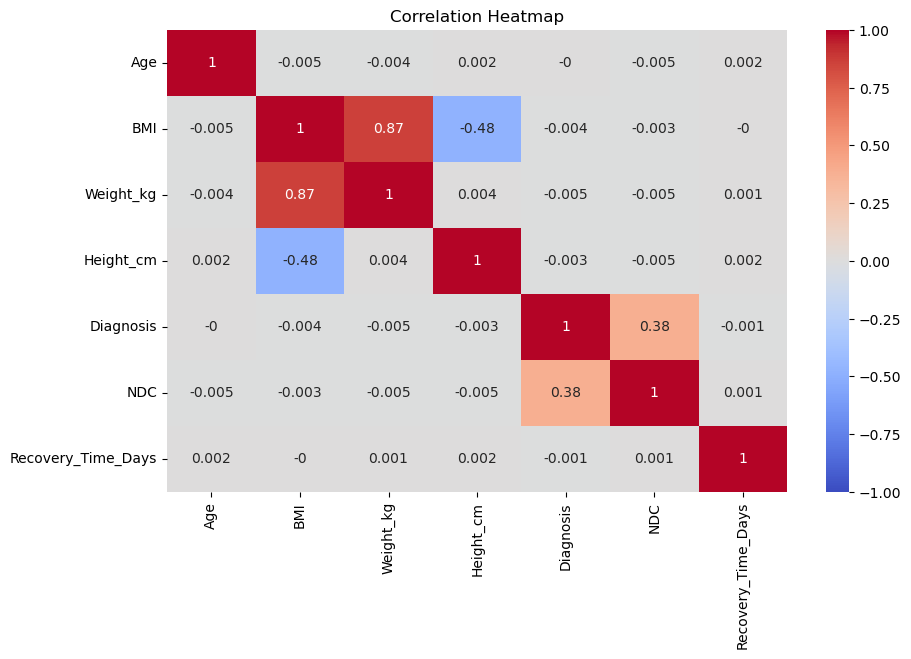

In [16]:
df_numeric = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize = (10,6))
sns.heatmap(df_numeric.corr().round(3),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

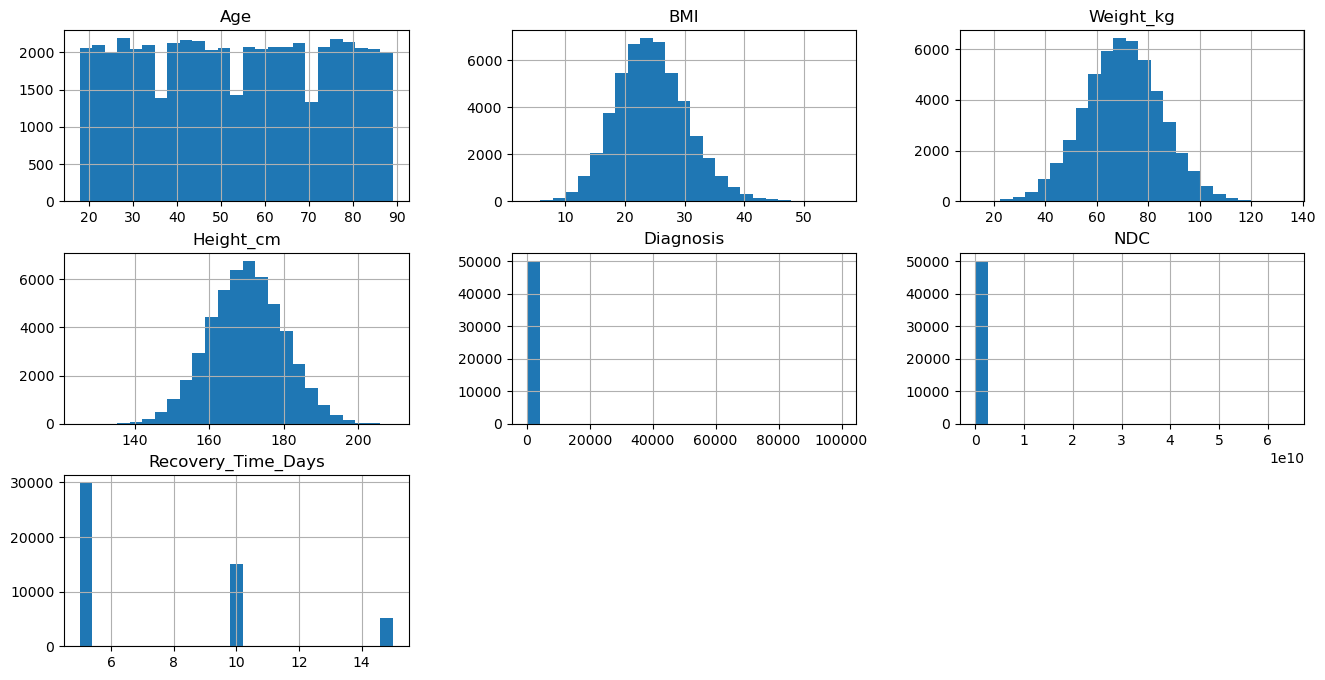

In [17]:
df_numeric.hist(bins=25,figsize=(16,8))
plt.show()

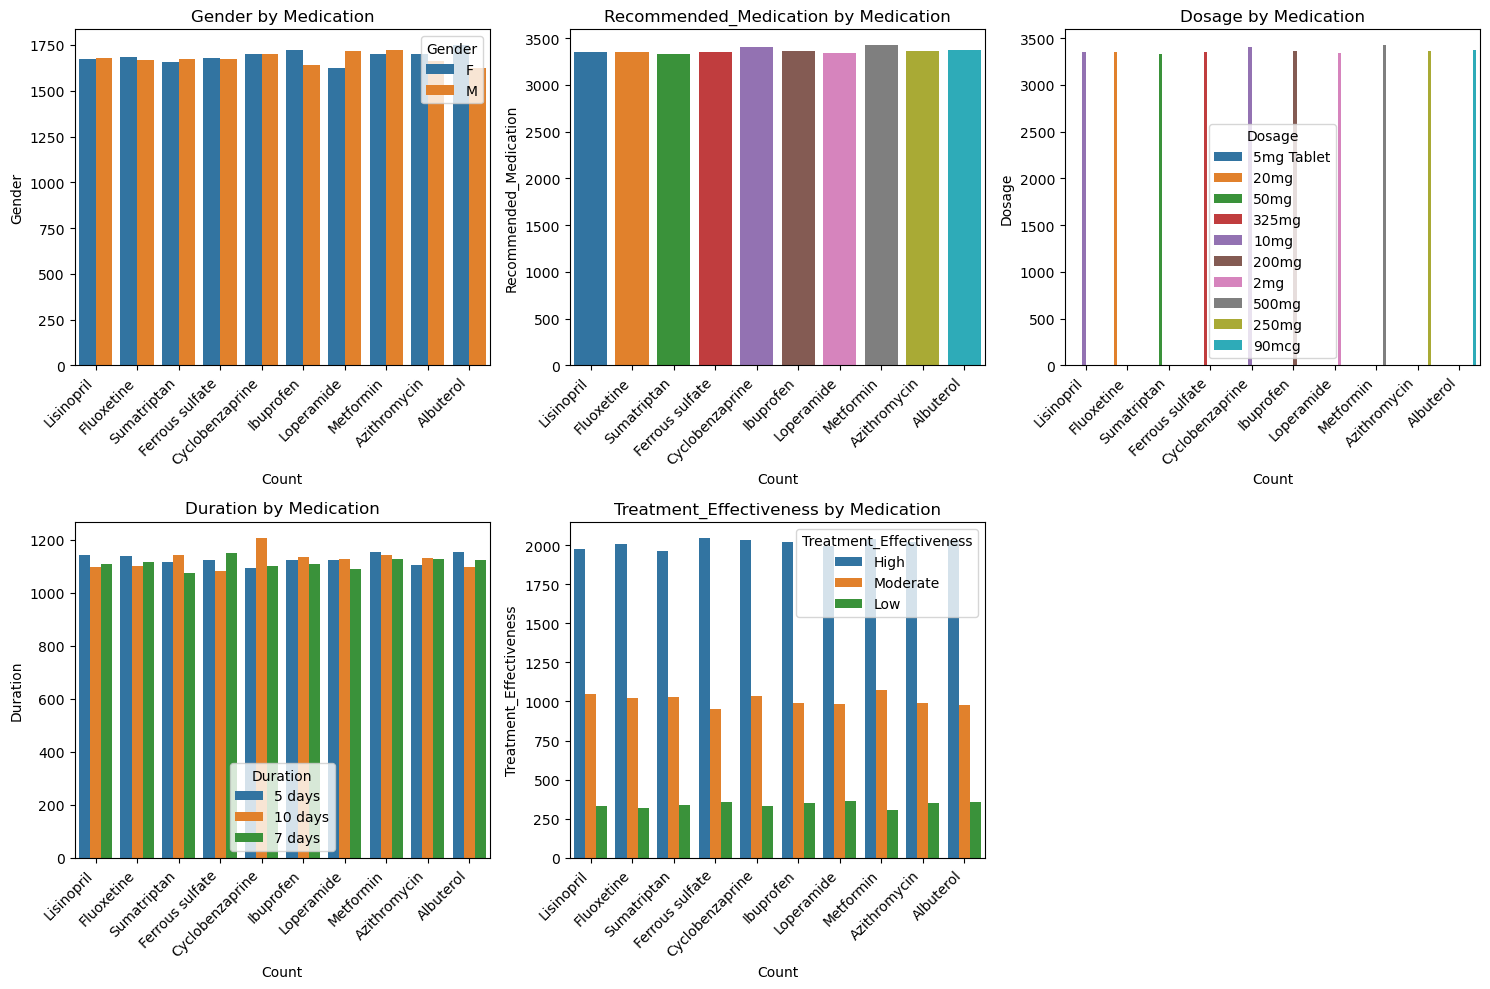

In [18]:
#Analyze categorical columns 

df_category=df.select_dtypes(include=['object']).applymap(lambda x: ', '.join(x) if isinstance(x, list) else x)


df_exploded = df_category.explode('Symptoms')
df_exploded['Symptoms'] = df_exploded['Symptoms'].astype(str)
df_exploded = df_exploded.applymap(lambda x: ', '.join(x) if isinstance(x, list) else x)

top_meds = df_exploded['Recommended_Medication'].value_counts().index[:10]
df_top = df_exploded[df_exploded['Recommended_Medication'].isin(top_meds)].copy()

top_5_cat_cols = [col for col in df_top.select_dtypes(include=['object']).columns if 2 <= df_top[col].nunique() <= 10][:5]


fig, axes = plt.subplots(2, 3, figsize=(15, 10),squeeze=True)
axes = axes.flatten()
for i, col in enumerate(top_5_cat_cols):
    sns.countplot(data=df_top, x='Recommended_Medication',hue=col, ax=axes[i])
    axes[i].set_title(f"{col} by Medication")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(3, 1), loc='upper right')
# Remove unused axes
for j in range(len(top_5_cat_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

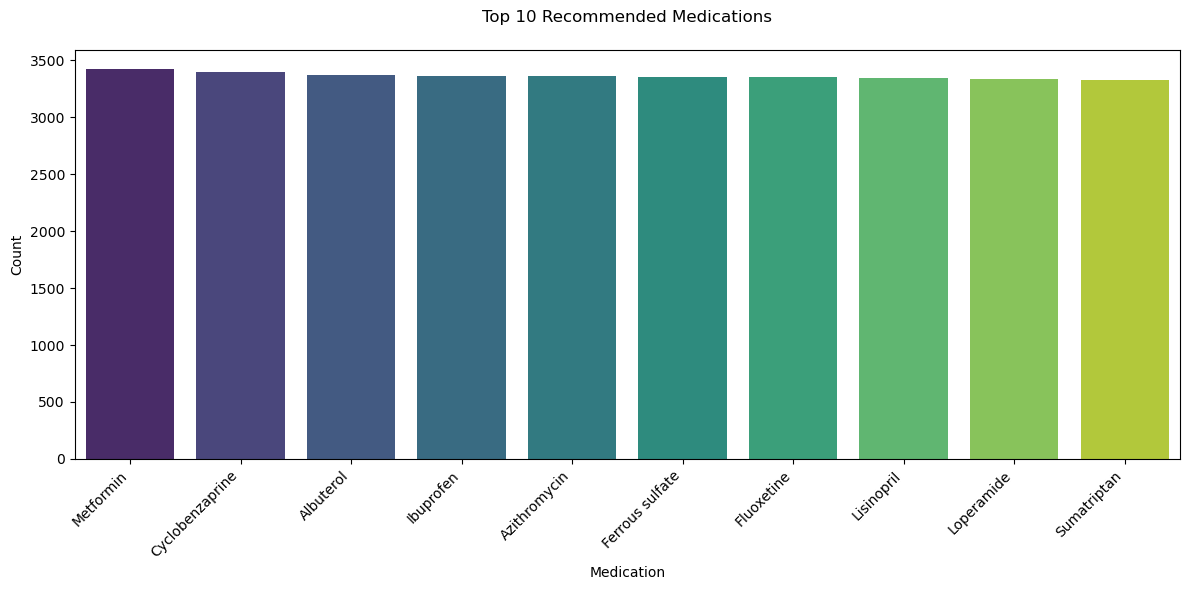

In [19]:

top_meds_counts = df['Recommended_Medication'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_meds_counts.index, y=top_meds_counts.values, palette="viridis")

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Recommended Medications", pad=20)
plt.xlabel("Medication")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [20]:
#Function to get medication by condition
def get_medication_for_symptoms(condition):
    def condition_matcher(x):
        if isinstance(x, list):
            return any(condition.lower() in s.lower() for s in x)
        elif isinstance(x, str):
            return condition.lower() in x.lower()
        return False

    matched_rows = df[df['Chronic_Conditions'].apply(condition_matcher)]
    
    if matched_rows.empty:
        print(f"No matches found for condition: '{condition}'")
        return []

    medications = matched_rows['Recommended_Medication'].explode().dropna().unique()
    print(f"Medications for condition '{condition}':\n", medications)
    return 


In [21]:
get_medication_for_symptoms('Headache')

Medications for condition 'Headache':
 ['Pantoprazole' 'Sumatriptan']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50094 non-null  int64  
 1   Gender                   50094 non-null  object 
 2   BMI                      50094 non-null  float64
 3   Weight_kg                50094 non-null  float64
 4   Height_cm                50094 non-null  float64
 5   Chronic_Conditions       50094 non-null  object 
 6   Symptoms                 50094 non-null  object 
 7   Diagnosis                50094 non-null  float64
 8   Recommended_Medication   50083 non-null  object 
 9   NDC                      50094 non-null  int64  
 10  Dosage                   50094 non-null  object 
 11  Duration                 50094 non-null  object 
 12  Treatment_Effectiveness  50094 non-null  object 
 13  Recovery_Time_Days       50094 non-null  int64  
dtypes: float64(4), int64(3

#Feature Engineering


In [24]:
#convert text in symptom and chronic condition columns using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

def prepare_text_column(column):
    
    def normalize(x):
        if isinstance(x, list):
            return ' '.join(str(i) for i in x)
        elif isinstance(x, str):
            return x
        else:
            return ''
    return column.fillna('').apply(normalize)

In [25]:

#Feature Extraction :convert text in symptom and chronic condition columns using countvectorizer
df['Symptoms_clean'] = prepare_text_column(df['Symptoms'])
df['Chronic_Conditions_clean'] = prepare_text_column(df['Chronic_Conditions'])

# Vectorize Symptoms
symptom_vectorizer = CountVectorizer(binary=True, stop_words='english', max_features=100)
symptom_encoded = symptom_vectorizer.fit_transform(df['Symptoms_clean'])

# Vectorize Chronic Conditions
chronic_vectorizer = CountVectorizer(binary=True, stop_words='english', max_features=100)
chronic_encoded = chronic_vectorizer.fit_transform(df['Chronic_Conditions_clean'])

# Convert to DataFrame
symptom_df = pd.DataFrame(symptom_encoded.toarray(), columns=[f"Symptom_{w}" for w in symptom_vectorizer.get_feature_names_out()])
chronic_df = pd.DataFrame(chronic_encoded.toarray(), columns=[f"Chronic_{w}" for w in chronic_vectorizer.get_feature_names_out()])

# Combine with original DataFrame
df_final = pd.concat([df, symptom_df, chronic_df], axis=1)


In [26]:
#drop rows with NaN values
df_final = df_final.dropna(axis=0)


In [27]:
df_final.sample(10)

,Age,Gender,BMI,Weight_kg,Height_cm,Chronic_Conditions,Symptoms,Diagnosis,Recommended_Medication,NDC,...,Chronic_tract,Chronic_transfusion,Chronic_transplant,Chronic_unstable,Chronic_upper,Chronic_urinary,Chronic_valve,Chronic_variceal,Chronic_vehicle,Chronic_vomiting
283,64,M,25.0,72.7,170.4,Diarrhea,"['Abdominal cramps, Loose stools, Urgency to d...",787.91,Loperamide,5740397,...,0,0,0,0,0,0,0,0,0,0
8704,82,M,22.4,55.8,157.8,Diarrhea,"['Loose stools, Urgency to defecate, Abdominal...",787.91,Loperamide,5740397,...,0,0,0,0,0,0,0,0,0,0
42331,82,F,22.7,59.6,162.2,Urinary tract infection,['Frequent urination'],599.00,Nitrofurantoin,931713,...,1,0,0,0,0,1,0,0,0,0
9436,59,F,29.7,88.1,172.1,Pneumonia,['Cough'],486.00,Azithromycin,167140492,...,0,0,0,0,0,0,0,0,0,0
45066,43,M,24.7,80.0,179.9,Diabetes mellitus without mention of complication,"['Fatigue, Increased thirst, Frequent urination']",250.00,Metformin,931048,...,0,0,0,0,0,0,0,0,0,0
2328,60,M,17.9,48.9,165.5,Urinary tract infection,['Pelvic pain'],599.00,Nitrofurantoin,931713,...,1,0,0,0,0,1,0,0,0,0
37195,37,F,32.6,90.2,166.3,Myalgia and myositis,"['Muscle pain, Tenderness']",729.10,Cyclobenzaprine,939752,...,0,0,0,0,0,0,0,0,0,0
45468,22,F,30.8,91.2,172.1,Pneumonia,"['Fever, Cough, Shortness of breath']",486.00,Azithromycin,167140492,...,0,0,0,0,0,0,0,0,0,0
4176,86,M,27.4,89.8,180.9,Urinary tract infection,"['Pelvic pain, Frequent urination']",599.00,Nitrofurantoin,931713,...,1,0,0,0,0,1,0,0,0,0
26215,53,F,22.5,74.9,182.6,Diabetes mellitus without mention of complication,['Frequent urination'],250.00,Metformin,931048,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Feature Engineering: Encoding and impute features 

ONEHOT_FEATURES = ['Gender', 'Duration','Dosage']
ORDINAL_FEATURE = ['Treatment_Effectiveness']
NUMERICAL_FEATURES = ['Age','Weight_kg','Height_cm','BMI','Diagnosis','NDC']

#Creating a preprocessor
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent', fill_value='missing')),
     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
   
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, ONEHOT_FEATURES),
        ('ord', ordinal_transformer,ORDINAL_FEATURE),
       
    ]
)


In [29]:
FEATURES = NUMERICAL_FEATURES + ONEHOT_FEATURES+ORDINAL_FEATURE+symptom_df.columns.tolist()+chronic_df.columns.tolist()
df_final[FEATURES]

,Age,Weight_kg,Height_cm,BMI,Diagnosis,NDC,Gender,Duration,Dosage,Treatment_Effectiveness,...,Chronic_tract,Chronic_transfusion,Chronic_transplant,Chronic_unstable,Chronic_upper,Chronic_urinary,Chronic_valve,Chronic_variceal,Chronic_vehicle,Chronic_vomiting
0,37,71.8,167.8,25.5,99591.00,51079081120,F,5 days,10MG TAB,High,...,0,0,0,0,0,0,0,0,0,0
1,58,82.2,188.8,23.1,389.00,74610204,F,14 days,40MG/4ML VIAL,High,...,0,0,0,0,0,0,0,0,0,0
2,76,48.4,156.4,19.8,81201.00,74131230,F,5 days,2mg/mL Syringe,Moderate,...,0,0,0,0,0,0,0,0,0,0
3,51,84.0,167.7,29.9,389.00,310030011,M,10 days,1000mg/100mL Vial,Moderate,...,0,0,0,0,0,0,0,0,0,0
4,22,51.8,159.4,20.4,431.00,55390007310,F,7 days,5mg/5mL Vial,Moderate,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50089,23,73.6,159.7,28.9,311.00,494900,F,7 days,20mg,High,...,0,0,0,0,0,0,0,0,0,0
50090,88,75.6,159.3,29.8,787.01,1730601,M,10 days,4mg,High,...,0,0,0,0,0,0,0,0,0,1
50091,20,74.9,174.7,24.5,724.20,5271402,M,7 days,200mg,Moderate,...,0,0,0,0,0,0,0,0,0,0
50092,43,37.5,157.2,15.2,784.00,245910,M,10 days,50mg,High,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Count the number of samples per class
class_counts = df_final['Recommended_Medication'].value_counts()

# Keep only classes with at least 2 samples
valid_classes = class_counts[class_counts >= 2].index
df_filtered = df_final[df_final['Recommended_Medication'].isin(valid_classes)]
df_filtered

FEATURES = NUMERICAL_FEATURES + ONEHOT_FEATURES+ORDINAL_FEATURE+symptom_df.columns.tolist()+chronic_df.columns.tolist()
X = df_filtered[FEATURES]

df_filtered['Recommended_Medication']= df_filtered['Recommended_Medication'].astype(str)
df_filtered['Recommended_Medication_list'] = df_filtered['Recommended_Medication'].apply(lambda x: [med.strip() for med in x.split(',')])
y = df_filtered['Recommended_Medication_list']

In [31]:
print(X.isnull().sum().sum(), y.isnull().sum())

0 0


In [32]:
#split to train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")


Training set size: (33532, 210). Training labels size: (33532,)
Test set size: (16516, 210). Test labels size: (16516,)


In [33]:
y_train.sample(10)

26158          [Metformin]
4184     [Cyclobenzaprine]
24250          [Albuterol]
49704        [Sumatriptan]
23706           [Zolpidem]
3087         [Ondansetron]
11406        [Sumatriptan]
27737     [Nitrofurantoin]
14365    [Ferrous sulfate]
9571         [Ondansetron]
Name: Recommended_Medication_list, dtype: object

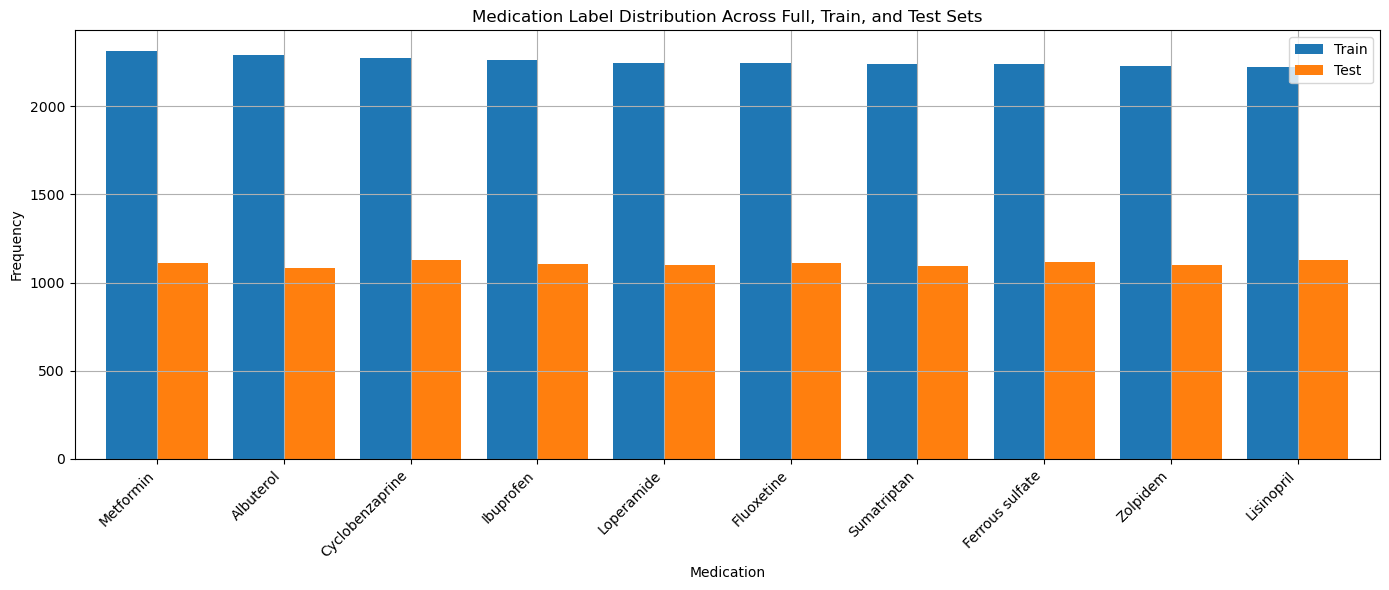

In [34]:
#Medication distribution between train and test set
mlb = MultiLabelBinarizer()

y_train_encoded = mlb.fit_transform(y_train)
y_test_encoded = mlb.transform(y_test)


y_train_df = pd.DataFrame(y_train_encoded,columns=mlb.classes_)
y_test_df = pd.DataFrame(y_test_encoded,columns=mlb.classes_)

# Step 2: Get label frequencies (i.e., how often each medication appears)

train_dist = y_train_df.sum()
test_dist = y_test_df.sum()

top_n = 10
top_medications = train_dist.sort_values(ascending=False).head(top_n).index.tolist()

# Step 4: Slice the top meds

train_top = train_dist[top_medications]
test_top = test_dist[top_medications]

# Step 5: Combine for plotting
distribution_df = pd.DataFrame({
    'Train': train_top,
    'Test': test_top
})

# Step 4: Plot
distribution_df.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("Medication Label Distribution Across Full, Train, and Test Sets")
plt.xlabel("Medication")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [35]:
train_top

Metformin          2314
Albuterol          2291
Cyclobenzaprine    2275
Ibuprofen          2261
Loperamide         2242
Fluoxetine         2242
Sumatriptan        2237
Ferrous sulfate    2237
Zolpidem           2227
Lisinopril         2224
dtype: int64

In [36]:
y_train_df.head(10)

,Acetaminophen,Albuterol,Azithromycin,Cyclobenzaprine,Ferrous sulfate,Fluoxetine,Furosemide,Heparin,Ibuprofen,Influenza,...,Multivitamins,Nitrofurantoin,Omeprazole,Ondansetron,Polyvalent,Sumatriptan,Vac,Vaccine,Virus,Zolpidem
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Preprocess all features , since symptom and chronic conditions have been vectorized,
# these columns are included post preprocessing other columns
CORE_FEATURES = NUMERICAL_FEATURES + ONEHOT_FEATURES + ORDINAL_FEATURE
SYMPTOM_FEATURES = symptom_df.columns.tolist()
CHRONIC_FEATURES = chronic_df.columns.tolist()

X_train_core = preprocessor.fit_transform(X_train[CORE_FEATURES])
X_test_core = preprocessor.transform(X_test[CORE_FEATURES])

X_train_cc = X_train[SYMPTOM_FEATURES + CHRONIC_FEATURES].values
X_test_cc = X_test[SYMPTOM_FEATURES + CHRONIC_FEATURES].values

X_train_final = np.concatenate([X_train_core, X_train_cc], axis=1)
X_test_final = np.concatenate([X_test_core, X_test_cc], axis=1)

numerical_column_names = NUMERICAL_FEATURES

ordinal_column_names = preprocessor.named_transformers_['ord'].get_feature_names_out(ORDINAL_FEATURE)

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
onehot_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(ONEHOT_FEATURES)

# Combine the names of numerical and all other feature columns into a single list
all_column_names = list(numerical_column_names) +list(onehot_column_names)+list(ordinal_column_names)+SYMPTOM_FEATURES+CHRONIC_FEATURES



In [38]:
X_train_final

array([[-0.88943814,  0.52317205,  1.58745882, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.66739097, -0.53293848, -1.90454262, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.23321244, -1.66925994, -2.60494406, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.66739097,  1.24507039,  1.07716635, ...,  0.        ,
         0.        ,  0.        ],
       [-1.46834284,  2.28781244, -1.56434764, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45525961,  0.69696239, -0.06348742, ...,  0.        ,
         0.        ,  1.        ]])

In [39]:
# Convert the matrix into a DataFrame with the column names for train
X_train_processed_df = pd.DataFrame(X_train_final, columns=all_column_names)

X_train_processed_df


,Age,Weight_kg,Height_cm,BMI,Diagnosis,NDC,Gender_F,Gender_M,Duration_10 days,Duration_14 days,...,Chronic_tract,Chronic_transfusion,Chronic_transplant,Chronic_unstable,Chronic_upper,Chronic_urinary,Chronic_valve,Chronic_variceal,Chronic_vehicle,Chronic_vomiting
0,-0.889438,0.523172,1.587459,-0.330749,-0.060881,-0.054048,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.667391,-0.532938,-1.904543,0.449781,0.136359,-0.054048,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.233212,-1.669260,-2.604944,-0.463606,-0.160125,0.302287,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.088486,0.402856,1.527424,-0.380570,0.131424,-0.050615,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117565,1.178228,0.576880,0.649065,-0.230107,-0.055064,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33527,-0.503502,-1.221416,0.236685,-1.177708,0.131424,-0.050615,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33528,1.667391,-0.258884,-0.073493,-0.231107,0.134042,-0.055268,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33529,1.667391,1.245070,1.077166,0.433174,-0.089297,-0.054856,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33530,-1.468343,2.287812,-1.564348,3.206548,0.137052,-0.050754,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Convert the matrix into a DataFrame with the column names for test
X_test_processed_df = pd.DataFrame(X_test_final, columns=all_column_names)

X_test_processed_df.head()

,Age,Weight_kg,Height_cm,BMI,Diagnosis,NDC,Gender_F,Gender_M,Duration_10 days,Duration_14 days,...,Chronic_tract,Chronic_transfusion,Chronic_transplant,Chronic_unstable,Chronic_upper,Chronic_urinary,Chronic_valve,Chronic_variceal,Chronic_vehicle,Chronic_vomiting
0,-1.130648,0.429593,2.798153,-0.828960,0.088004,-0.051140,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.021081,0.442961,-1.724439,1.396382,-0.160125,0.302287,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.358775,-0.085094,-0.123522,-0.065037,0.134042,-0.055268,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.461340,-0.526254,1.327310,-0.995031,0.131363,-0.053595,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.516585,0.309276,0.016558,0.217283,-0.008384,-0.054705,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
y_train_df

,Acetaminophen,Albuterol,Azithromycin,Cyclobenzaprine,Ferrous sulfate,Fluoxetine,Furosemide,Heparin,Ibuprofen,Influenza,...,Multivitamins,Nitrofurantoin,Omeprazole,Ondansetron,Polyvalent,Sumatriptan,Vac,Vaccine,Virus,Zolpidem
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33527,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33529,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:

baseline = MultiOutputClassifier(DummyClassifier(strategy="stratified"))
baseline.fit(X_train_processed_df, y_train_df)
y_pred_baseline = baseline.predict(X_test_processed_df)

print("Baseline Accuracy:", accuracy_score(y_test_df, y_pred_baseline))
print("Baseline F1 Score:", f1_score(y_test_df, y_pred_baseline, average='weighted'))

conf_matrices = multilabel_confusion_matrix(y_test_df, y_pred_baseline)                       

Baseline Accuracy: 0.024158391862436426
Baseline F1 Score: 0.06703043775730538


In [47]:
print(y_test_df.nunique())

Acetaminophen      2
Albuterol          2
Azithromycin       2
Cyclobenzaprine    2
Ferrous sulfate    2
Fluoxetine         2
Furosemide         2
Heparin            2
Ibuprofen          2
Influenza          2
Insulin            1
Lisinopril         2
Loperamide         2
Metformin          2
Metoprolol         2
Multivitamins      2
Nitrofurantoin     2
Omeprazole         2
Ondansetron        2
Polyvalent         2
Sumatriptan        2
Vac                2
Vaccine            2
Virus              2
Zolpidem           2
dtype: int64


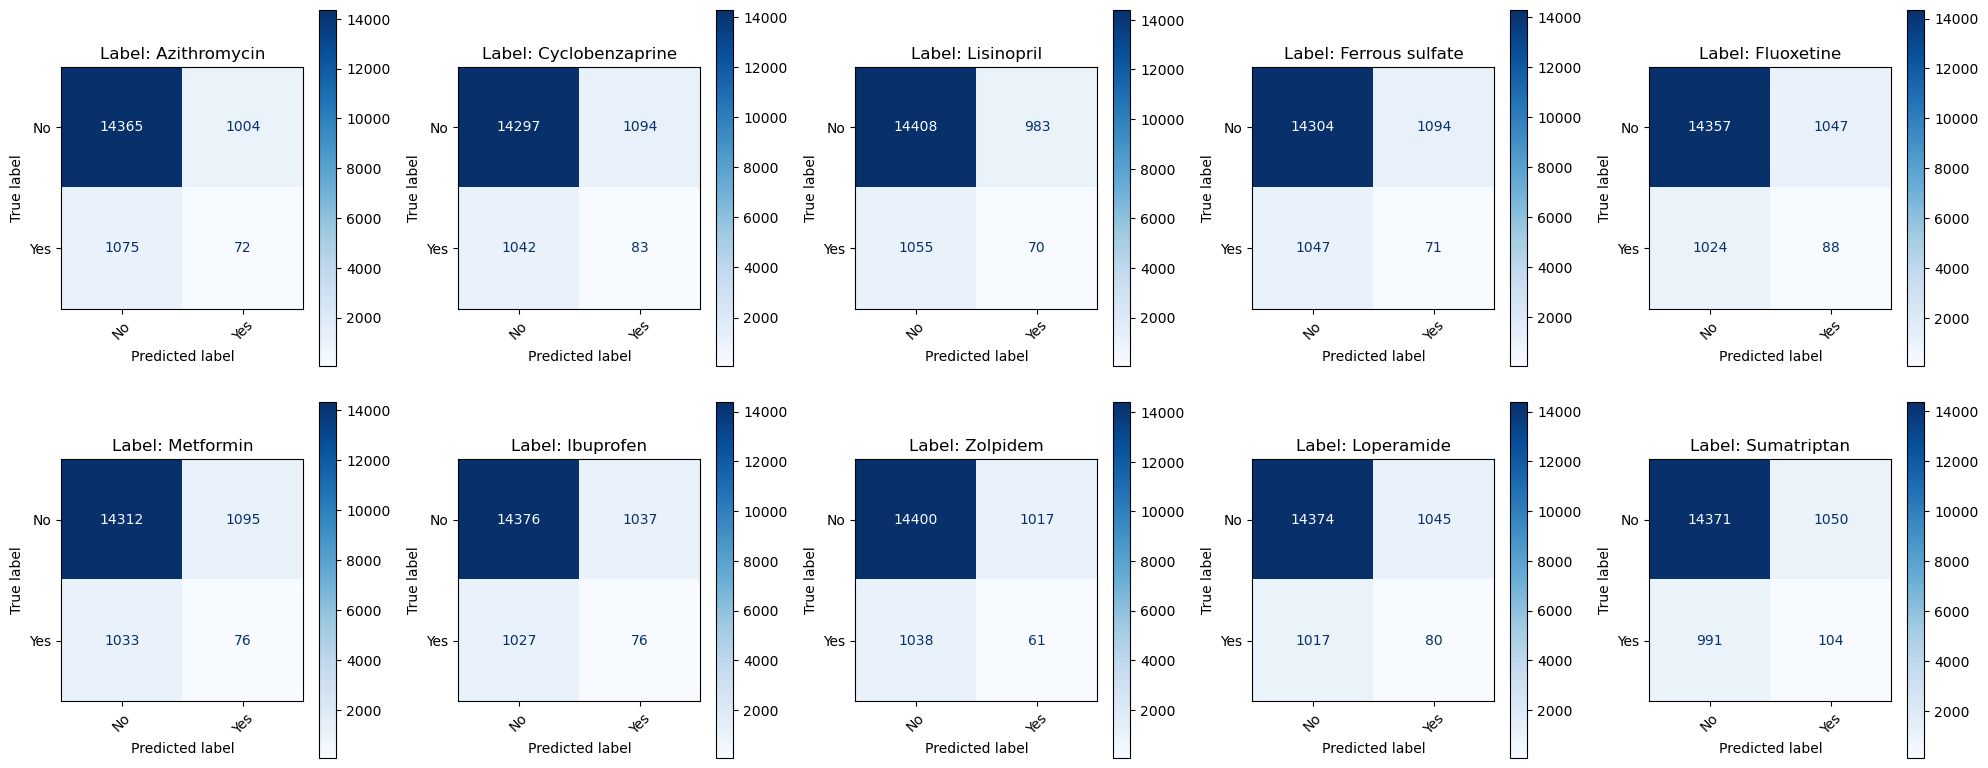

In [49]:
top_n = 10
label_sums = y_test_df.sum(axis=0)
top_labels = label_sums.sort_values(ascending=False).head(top_n).index.tolist()

# Filter confusion matrices and class names
label_indices = [list(mlb.classes_).index(label) for label in top_labels]
top_cm = conf_matrices[label_indices]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (cm, label) in enumerate(zip(top_cm, top_labels)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(ax=axes[i], cmap="Blues", values_format='d')
    axes[i].set_title(f"Label: {label}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [89]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X_resampled = []
y_resampled = []

for label in y_train_df.columns:
    count = y_train_df[label].value_counts()
    minority_count = count.min()

    # Set k_neighbors to max(1, min_class_count - 1)
    k_neighbors = max(1, minority_count - 1)

    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    
    X_resampled.append(X_res)
    y_resampled.append(y_res)

X_train_balanced = pd.DataFrame(X_resampled[0], columns=X_train_processed_df.columns)
y_train_balanced = pd.DataFrame(np.array(y_resampled).T, columns=y_train_df.columns)
print(f"Training set size: {X_train_balanced.shape}. Training labels size: {y_train_balanced.shape}")


Training set size: (62580, 240). Training labels size: (62580, 25)


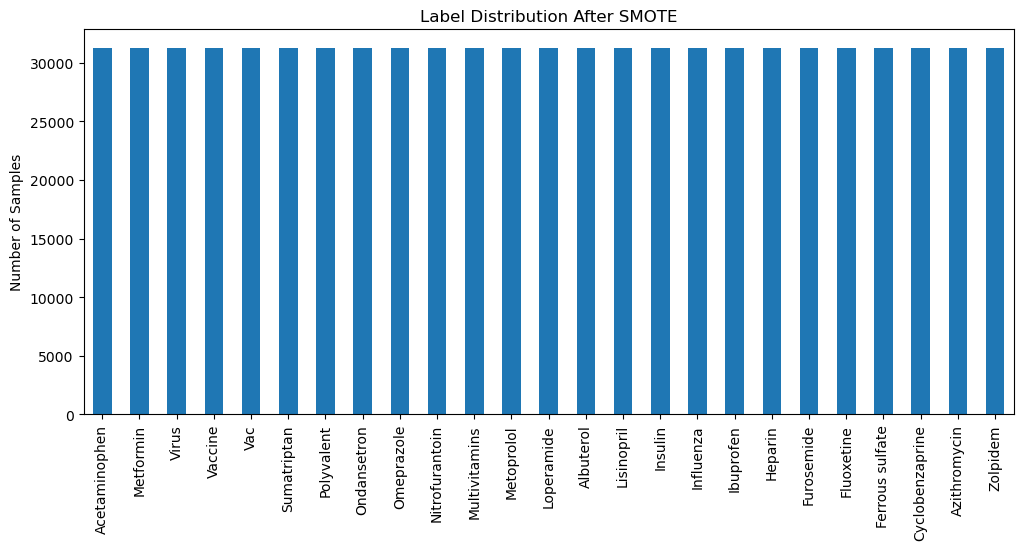

In [93]:
label_counts = y_train_balanced.sum().sort_values(ascending=False)
label_counts.plot(kind='bar', figsize=(12, 5), title="Label Distribution After SMOTE")
plt.ylabel("Number of Samples")
plt.show()

Baseline Accuracy: 0.00
Baseline Precision: 0.07
Baseline Recall: 0.50
Baseline F1 Score: 0.12


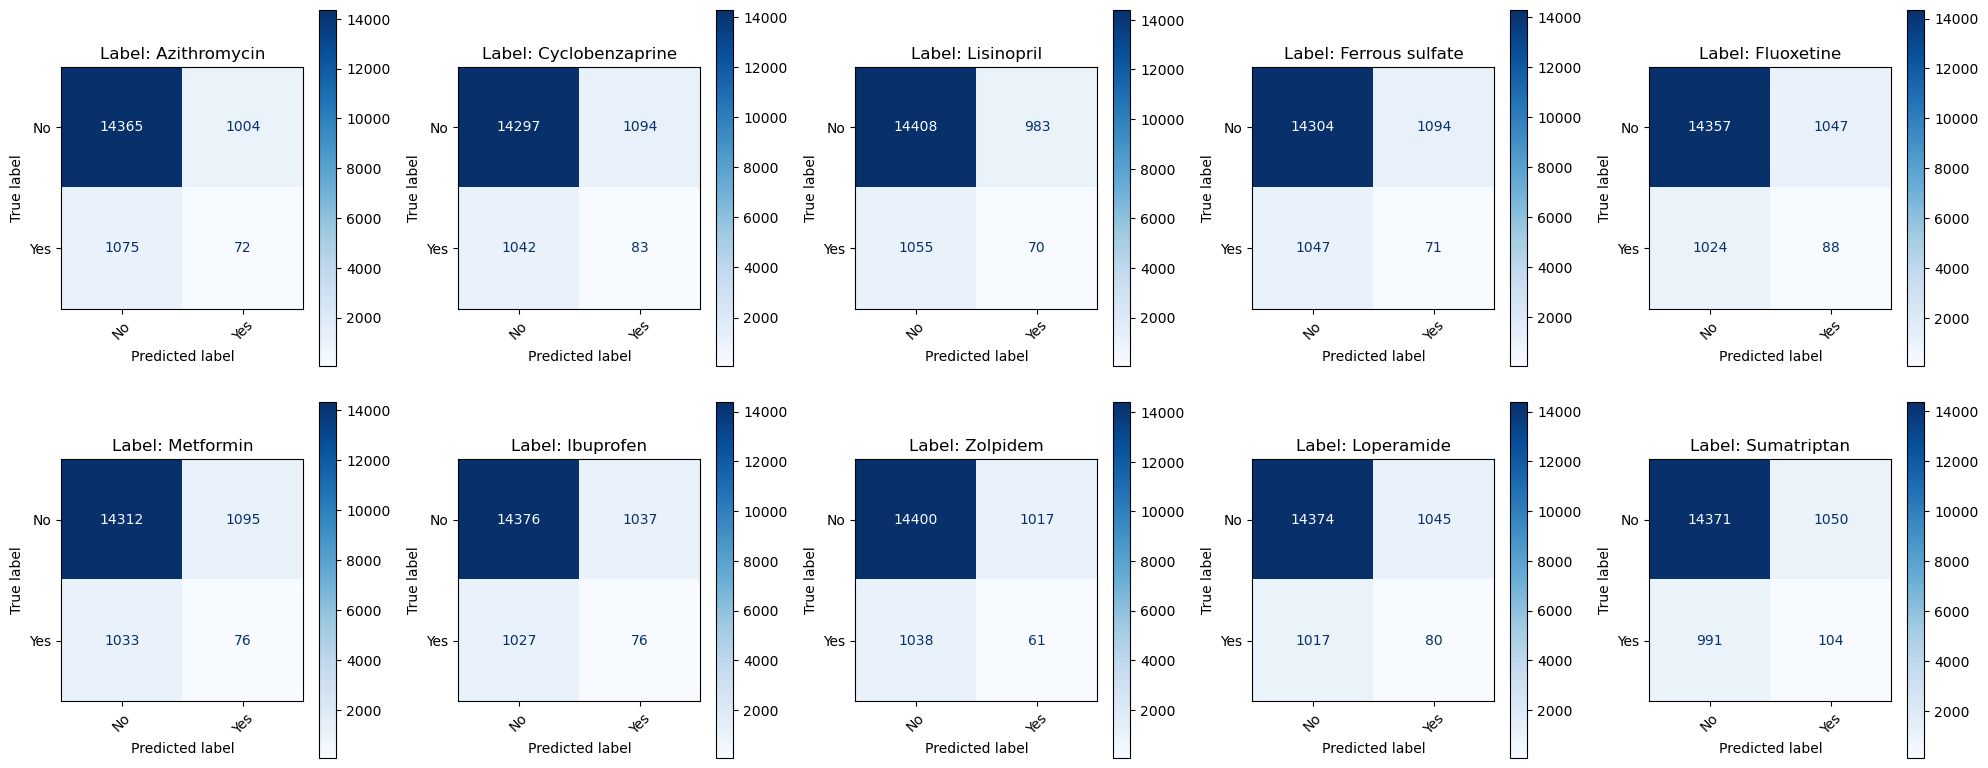

In [129]:
#A baseline model helps us understand whether our machine learning model is actually learning patterns or just memorizing class imbalances. 
# A random baseline (Dummy with stratified) shows performance without any predictive power, 
#while a dummy majority-class baseline (Dummy with most_frequent) reveals whether the model is just favoring the dominant class. 
# Comparing against these ensures that our model adds real value beyond guessing.

random_baseline = MultiOutputClassifier(DummyClassifier(strategy='stratified')) 
random_baseline.fit(X_train_balanced, y_train_balanced)
y_random_pred = random_baseline.predict(X_test_processed_df)

accuracy_baseline = accuracy_score(y_test_df, y_random_pred)
precision_baseline = precision_score(y_test_df, y_random_pred, average='weighted', zero_division=0)
recall_baseline = recall_score(y_test_df, y_random_pred, average='weighted', zero_division=0)
f1_baseline = f1_score(y_test_df, y_random_pred,average='weighted', zero_division=0)
conf_matrices_sm = multilabel_confusion_matrix(y_test_df, y_pred_baseline)  

print(f"Baseline Accuracy: {accuracy_baseline:.2f}")
print(f"Baseline Precision: {precision_baseline:.2f}")
print(f"Baseline Recall: {recall_baseline:.2f}")
print(f"Baseline F1 Score: {f1_baseline:.2f}")


top_n = 10
label_sums = y_test_df.sum(axis=0)
top_labels = label_sums.sort_values(ascending=False).head(top_n).index.tolist()

# Filter confusion matrices and class names
label_indices = [list(mlb.classes_).index(label) for label in top_labels]
top_cm = conf_matrices_sm[label_indices]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (conf_matrices_sm, label) in enumerate(zip(top_cm, top_labels)):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrices_sm, display_labels=["No", "Yes"])
    disp.plot(ax=axes[i], cmap="Blues", values_format='d')
    axes[i].set_title(f"Label: {label}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

<Figure size 400x300 with 0 Axes>

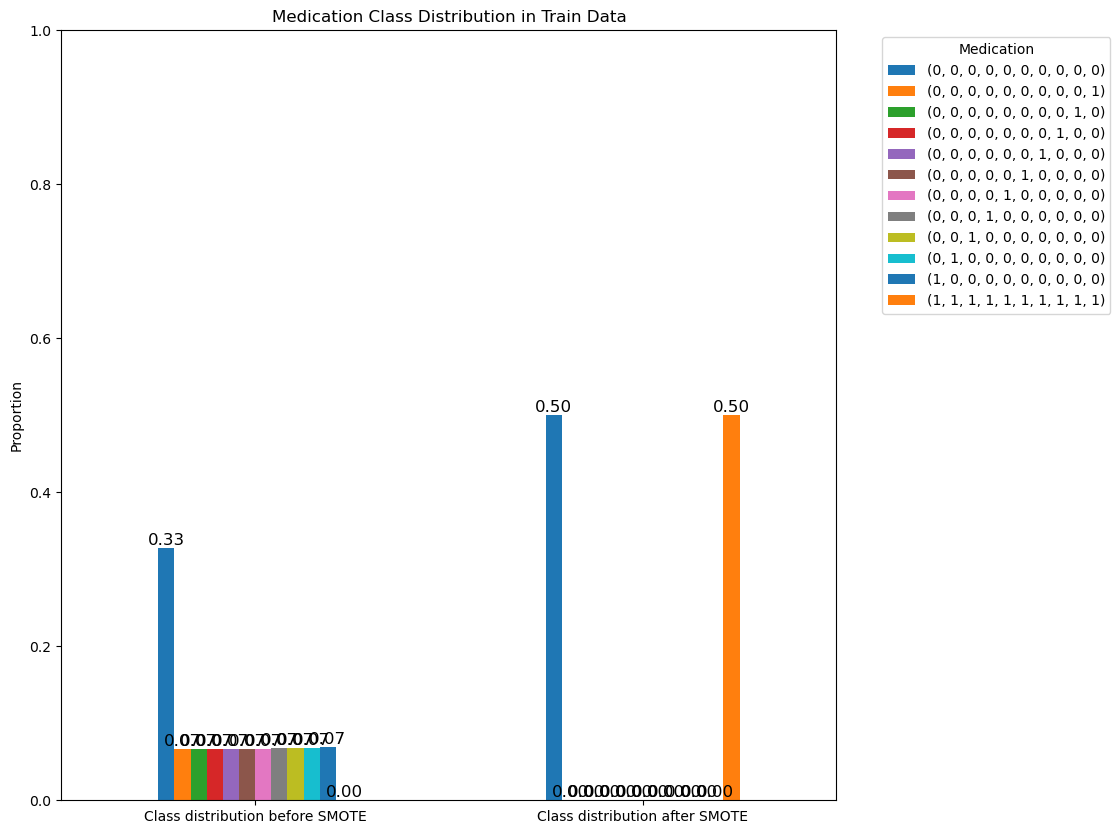

In [101]:
top_10_labels = y_train_df.sum().sort_values(ascending=False).head(10).index
y_train_distribution_df = pd.DataFrame({
    'Class distribution before SMOTE': y_train_df[top_10_labels].value_counts(normalize=True),
    'Class distribution after SMOTE': y_train_balanced[top_10_labels].value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_train_distribution_df.plot(kind='bar', figsize=(10,10), rot=0)

plt.title("Medication Class Distribution in Train Data")
plt.ylabel("Proportion")
plt.legend(title="Outcome")
plt.ylim(0, 1)
plt.legend(title="Medication", bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

In [55]:
np.unique(y_test_df)

array([0, 1])

In [57]:
#Simple model train
lgr_model = MultiOutputClassifier(LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42))
lgr_model.fit(X_train_processed_df,y_train_df)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=1000,
                                                   random_state=42))

In [59]:
y_pred_lgr = lgr_model.predict(X_test_processed_df)

train_accuracy = lgr_model.score(X_train_processed_df,y_train_df)
test_accuracy = accuracy_score(y_test_df,y_pred_lgr)

print(f"Logistic Regression Training Accuracy: {train_accuracy:.2f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.2f}")
print("\n Classification report:")
print(classification_report(y_test_df,y_pred_lgr))

Logistic Regression Training Accuracy: 1.00
Logistic Regression Test Accuracy: 1.00

 Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1093
           1       1.00      1.00      1.00      1083
           2       1.00      1.00      1.00      1147
           3       1.00      1.00      1.00      1125
           4       1.00      1.00      1.00      1118
           5       1.00      1.00      1.00      1112
           6       0.00      0.00      0.00         1
           7       0.40      1.00      0.57         2
           8       1.00      1.00      1.00      1103
           9       0.75      1.00      0.86         3
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00      1125
          12       1.00      1.00      1.00      1097
          13       1.00      1.00      1.00      1109
          14       0.00      0.00      0.00         1
          15       0.00   

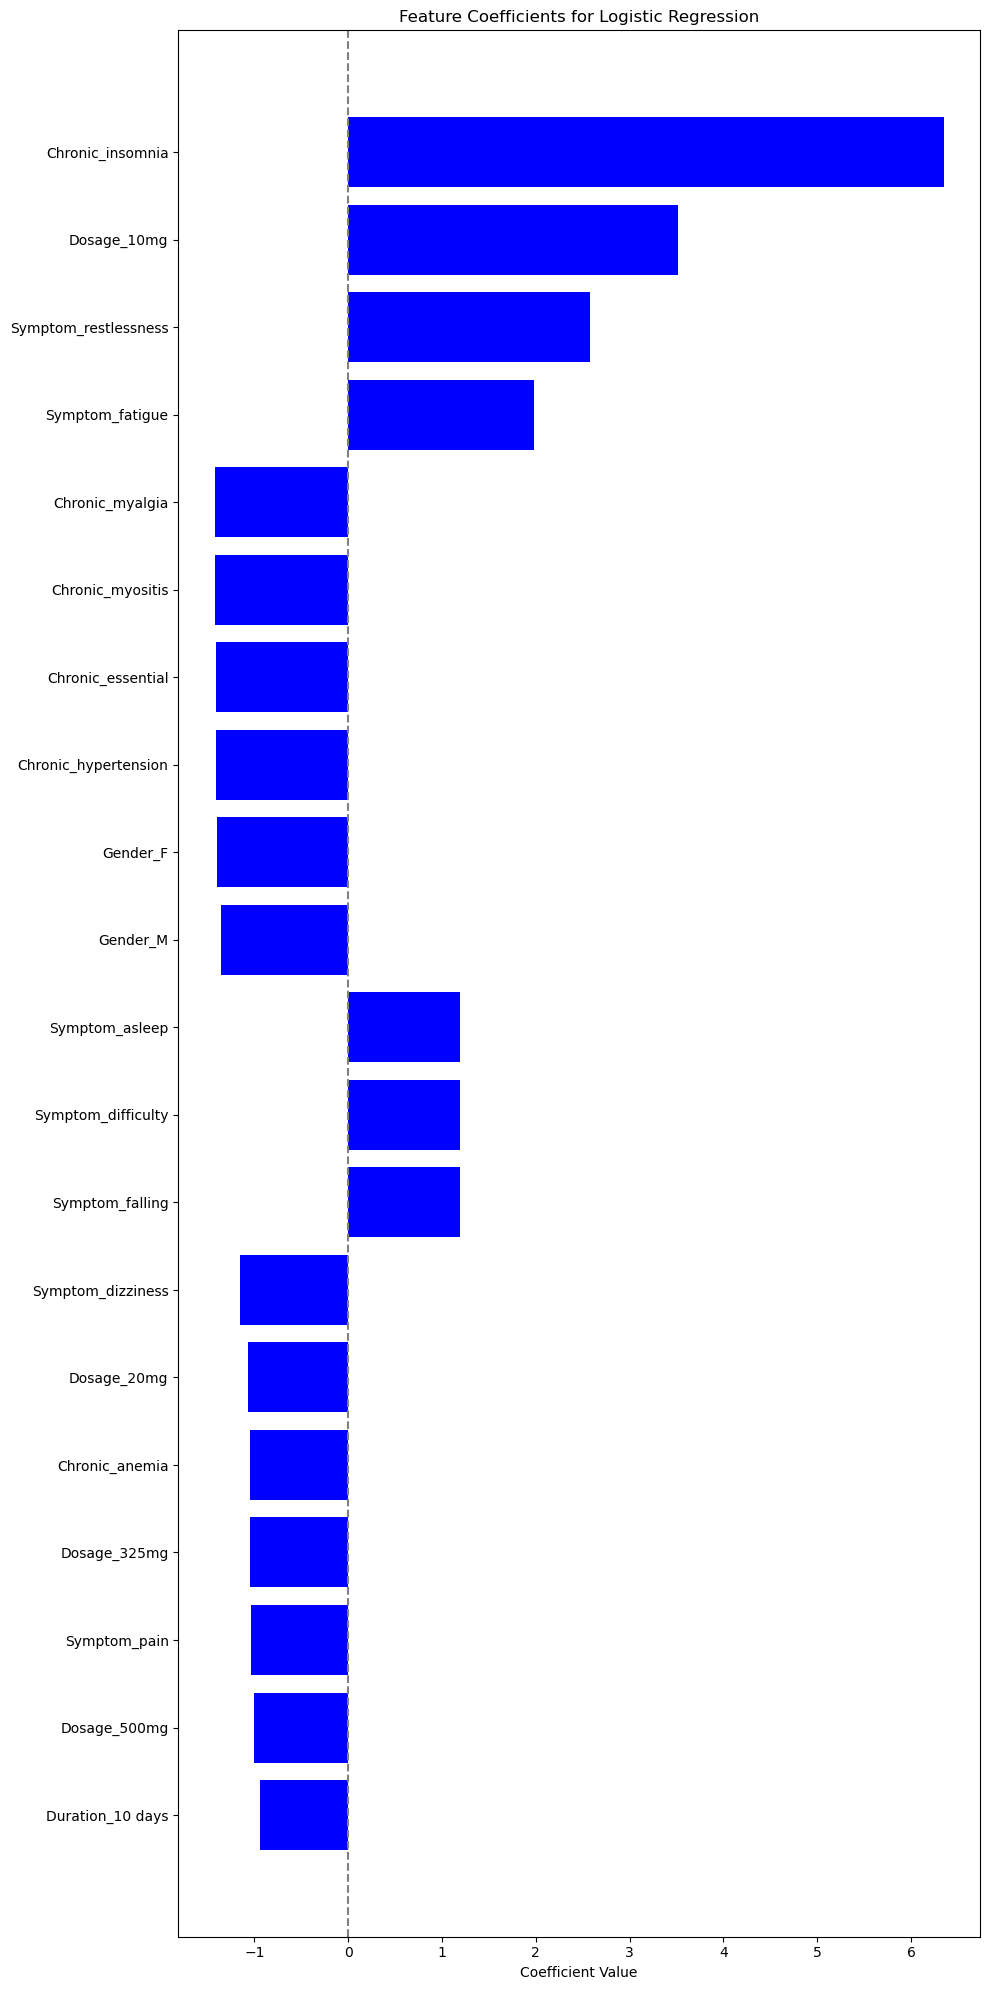

In [61]:
# coefficients =lgr_model.coef_[0]  # Get coefficients
feature_names = X_train_processed_df.columns
n_labels = len(y_train_df.columns)
n_cols = 2
n_rows = (n_labels + 1) // n_cols

for i, clf in enumerate(lgr_model.estimators_):
    label = y_train_df.columns[i]
    coefs = clf.coef_[0]  # shape: (1, n_features)
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs
    }).sort_values(by='Coefficient', key=abs, ascending=False).head(20)

# # Plot the coefficients
plt.figure(figsize=(10, 20))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')


plt.title('Feature Coefficients for Logistic Regression')
# Add vertical line at zero for better reference
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().invert_yaxis()  # To show the most influential features at the top
plt.tight_layout()
plt.show()

In [75]:
#create list to train models
models_train = {
    'Decision Tree': MultiOutputClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=42,class_weight='balanced')),
    'Naive Bayes Gaussian': MultiOutputClassifier(GaussianNB()),  
    'Bagging (Decision Tree)': MultiOutputClassifier(BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),n_jobs=-1,
                                                                       n_estimators=10,random_state=42)),
    'AdaBoost':MultiOutputClassifier(AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42,algorithm='SAMME'))
}
results_m = []
trained_models = {}

for model_name, model in models_train.items():
    print(f"Training and evaluating {model_name}")

 # Train the model on full training data and predict on the test set
    model.fit(X_train_processed_df, y_train_df)
    y_train_pred = model.predict(X_train_processed_df)
    y_test_pred = model.predict(X_test_processed_df)

    # Store trained model
    trained_models[model_name] = model

    # Compute train metrics
    train_accuracy = accuracy_score(y_train_df, y_train_pred)
    train_precision = precision_score(y_train_df, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_df, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train_df, y_train_pred, average='weighted', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test_df, y_test_pred)
    test_precision = precision_score(y_test_df, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_df, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test_df, y_test_pred, average='weighted', zero_division=0)

    # Store results
    results_m.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })

Training and evaluating Decision Tree
Training and evaluating Random Forest
Training and evaluating Naive Bayes Gaussian
Training and evaluating Bagging (Decision Tree)
Training and evaluating AdaBoost


In [77]:
results_df_m = pd.DataFrame(results_m).sort_values(by="Test F1",ascending=False)
print(results_df_m)

                     Model  Train Accuracy  Train Precision  Train Recall  \
0            Decision Tree        1.000000              1.0      1.000000   
4                 AdaBoost        1.000000              1.0      1.000000   
3  Bagging (Decision Tree)        0.999881              1.0      0.999881   
2     Naive Bayes Gaussian        1.000000              1.0      1.000000   
1            Random Forest        1.000000              1.0      1.000000   

   Train F1  Test Accuracy  Test Precision  Test Recall   Test F1  
0  1.000000       0.999879        0.999819     0.999879  0.999849  
4  1.000000       0.999455        0.999698     0.999697  0.999687  
3  0.999934       0.999576        0.999758     0.999576  0.999657  
2  1.000000       0.999273        0.999677     0.998850  0.999062  
1  1.000000       0.999092        0.998669     0.998487  0.998578  


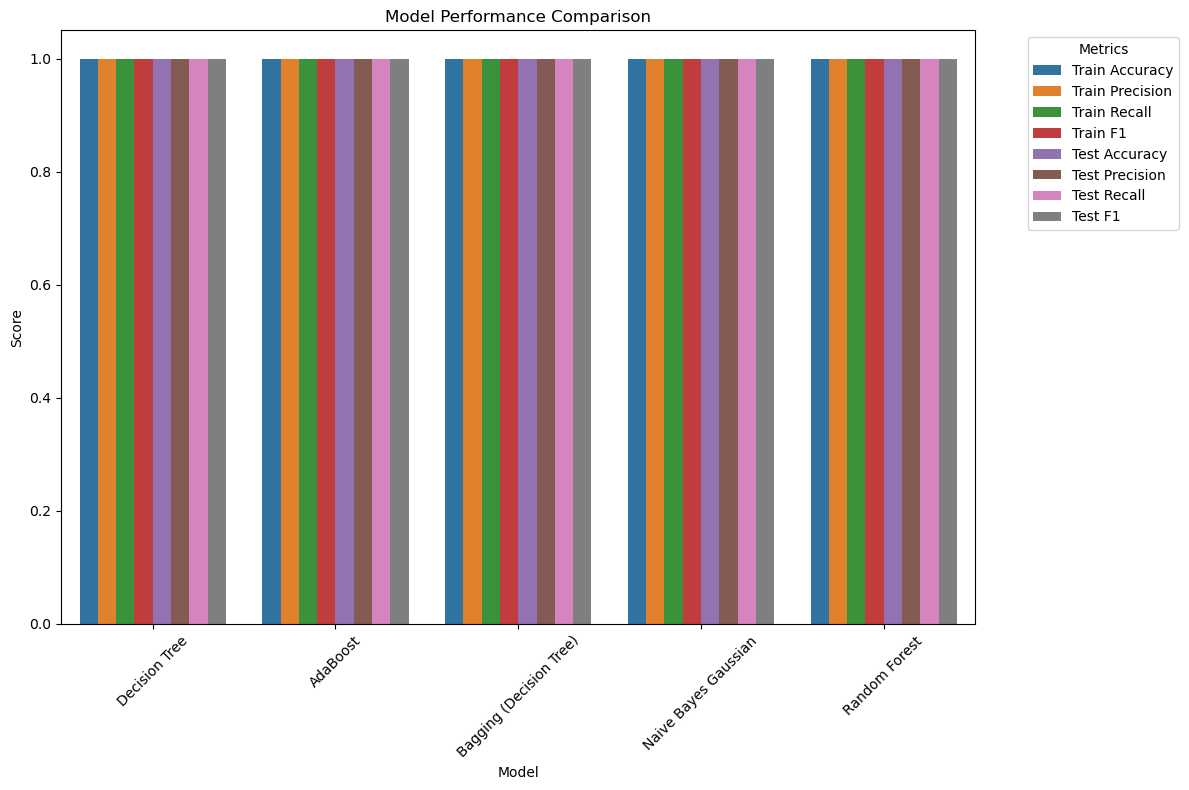

In [79]:
plt.figure(figsize=(12,8))
df_melted = results_df_m.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model',y='Score', hue='Metric',data=df_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Decision Tree:
Train Metrics: Perfect performance (1.0 for all metrics).
Test Metrics: Slightly lower than training performance, but still close to perfect (Test Accuracy = 0.999879, Test Precision = 0.999819).
General Observation: The Decision Tree has excellent performance but shows some slight overfitting due to the small difference in training vs. test scores.
Bagging (Decision Tree):
Train Metrics: Almost perfect (Train Accuracy = 0.999881, Train Precision = 1.0).
Test Metrics: Performance drops a little compared to the Decision Tree, but still very high (Test Accuracy = 0.999576).
General Observation: Bagging improves generalization (compared to a single decision tree), but test performance still slightly lags behind the training performance.
Naive Bayes (Gaussian):
Train Metrics: Perfect performance (Train Accuracy = 1.0, Train Precision = 1.0, etc.).
Test Metrics: Very close to perfect, though recall slightly drops (Test Recall = 0.998850).
General Observation: Naive Bayes appears to generalize very well. However, the performance might slightly degrade in terms of recall compared to the other models.
Random Forest:
Train Metrics: Perfect performance (Train Accuracy = 1.0, Train Precision = 1.0, etc.).
Test Metrics: A slight drop in test performance, particularly in precision and recall, but still quite high (Test Accuracy = 0.999092).
General Observation: Random Forest performs very well and is a strong model with high generalization, although like the other models, there is a slight decrease in test performance compared to training.

In [131]:
models_train = {
    'Decision Tree': MultiOutputClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=42,class_weight='balanced')),
    'Naive Bayes Gaussian': MultiOutputClassifier(GaussianNB()),  
    'Bagging (Decision Tree)': MultiOutputClassifier(BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),n_jobs=-1,
                                                                       n_estimators=10,random_state=42)),
    'AdaBoost':MultiOutputClassifier(AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42,algorithm='SAMME'))
}
results_m = []
trained_models = {}

for model_name, model in models_train.items():
    print(f"Training and evaluating {model_name}")

 # Train the model on full training data and predict on the test set
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_balanced)
    y_test_pred = model.predict(X_test_processed_df)

    # Store trained model
    trained_models[model_name] = model

    # Compute train metrics
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_precision = precision_score(y_train_balanced, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_balanced, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test_df, y_test_pred)
    test_precision = precision_score(y_test_df, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_df, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test_df, y_test_pred, average='weighted', zero_division=0)

    # Store results
    results_m.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })

Training and evaluating Decision Tree
Training and evaluating Random Forest
Training and evaluating Naive Bayes Gaussian
Training and evaluating Bagging (Decision Tree)
Training and evaluating AdaBoost


In [133]:
results_balanced_m = pd.DataFrame(results_m).sort_values(by="Test F1",ascending=False)
print(results_balanced_m)

                     Model  Train Accuracy  Train Precision  Train Recall  \
0            Decision Tree             1.0              1.0           1.0   
1            Random Forest             1.0              1.0           1.0   
2     Naive Bayes Gaussian             1.0              1.0           1.0   
3  Bagging (Decision Tree)             1.0              1.0           1.0   
4                 AdaBoost             1.0              1.0           1.0   

   Train F1  Test Accuracy  Test Precision  Test Recall   Test F1  
0       1.0            0.0        0.067288     0.067288  0.067288  
1       1.0            0.0        0.067288     0.067288  0.067288  
2       1.0            0.0        0.067288     0.067288  0.067288  
3       1.0            0.0        0.067288     0.067288  0.067288  
4       1.0            0.0        0.067288     0.067288  0.067288  


In [81]:
#model evaluation on test dataset
results_ev = {}

for model_name, model in models_train.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed_df)

    # Calculate metrics
    accuracy = accuracy_score(y_test_df, y_pred)
    precision = precision_score(y_test_df, y_pred,average='weighted')
    recall = recall_score(y_test_df, y_pred,average='weighted')
    f1 = f1_score(y_test_df, y_pred,average='weighted')
    
    conf_matrices = multilabel_confusion_matrix(y_test_df, y_pred)

    # Store the results in the dictionary
    results_ev[model_name] = {
        'Accuracy': accuracy,
        'Precision':precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix':conf_matrices
       
    }

In [83]:
results_df_ev = pd.DataFrame(results_ev).T.sort_values(by=['Accuracy'],ascending=False)
results_df_ev

,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
Decision Tree,0.999879,0.999819,0.999879,0.999849,"[[[15422, 1], [0, 1093]], [[15433, 0], [0, 108..."
Bagging (Decision Tree),0.999576,0.999758,0.999576,0.999657,"[[[15422, 1], [3, 1090]], [[15433, 0], [0, 108..."
AdaBoost,0.999455,0.999698,0.999697,0.999687,"[[[15422, 1], [1, 1092]], [[15433, 0], [0, 108..."
Naive Bayes Gaussian,0.999273,0.999677,0.99885,0.999062,"[[[15422, 1], [3, 1090]], [[15433, 0], [0, 108..."
Random Forest,0.999092,0.998669,0.998487,0.998578,"[[[15423, 0], [3, 1090]], [[15433, 0], [0, 108..."


All models performed exceptionally well, with Decision Tree and Bagging showing the highest scores across all metrics.
AdaBoost maintained a good trade-off between precision and recall, making it slightly more generalizable despite a slight dip in overall accuracy.
Naive Bayes and Random Forest had slightly lower recall, indicating they missed more true positive cases (i.e., more False Negatives).
The confusion matrices show that most models predict the majority classes very accurately while still correctly identifying minority classes (i.e., medication prescribed).

In [135]:

#cross-validation evaluation
results_cv = {}

# Train each model with cross-validation
for model_name, model in models_train.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_balanced,
        y_train_balanced,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    # Train the model on the full training set
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_processed_df)

    trained_models[model_name] = model

    # Store the results in the dictionary
    results_cv[model_name] = {
        'Model': model_name,
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
    }

Training and evaluating Decision Tree with cross-validation...
Training and evaluating Random Forest with cross-validation...
Training and evaluating Naive Bayes Gaussian with cross-validation...
Training and evaluating Bagging (Decision Tree) with cross-validation...
Training and evaluating AdaBoost with cross-validation...


In [137]:
results_df = pd.DataFrame(results_cv).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

,Model,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std)
Decision Tree,Decision Tree,1.0,0.0
Random Forest,Random Forest,1.0,0.0
Naive Bayes Gaussian,Naive Bayes Gaussian,1.0,0.0
Bagging (Decision Tree),Bagging (Decision Tree),1.0,0.0
AdaBoost,AdaBoost,1.0,0.0


In [ ]:
y_test

In [159]:
# Check the unique classes in y_train (the training set)
print(f"Classes in y_train: {np.unique(y_train_df)}")
# Check the unique classes in y_test (the test set)
print(f"Classes in y_test: {np.unique(y_test_df)}")

Classes in y_train: [0 1]
Classes in y_test: [0 1]


In [ ]:
X_train_final

In [ ]:
y_train_encoded

In [163]:
#Model Improvement Define models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {
        'model__estimator__n_neighbors': [3, 5, 7]
    }),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {
        'model__estimator__max_depth': [5, 10, 15]
    }),
    'randomforestclassifier': (RandomForestClassifier(), {
        'model__estimator__max_depth': [5, 10, 15]
    }),
    'gaussiannb': (GaussianNB(), {}), 
    'baggingclassifier': (BaggingClassifier(), {
        'model__estimator__n_estimators': [10, 50, 100],  # Hyperparameters for Bagging
        'model__estimator__max_samples': [0.5, 1.0]
    })
}
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    print(f"Tuning {name} with GridSearchCV...")
    pipeline = Pipeline([
        
        ('model', MultiOutputClassifier(model))  # Wrap the model in MultiOutputClassifier
    ])
    # print(pipeline)
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=3, n_jobs=-1,verbose=1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train_final, y_train_df)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train_final, y_train_df)
    test_score = best_model.score(X_test_final, y_test_df)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time])

Tuning knn with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning decisiontreeclassifier with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning randomforestclassifier with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning gaussiannb with GridSearchCV...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Tuning baggingclassifier with GridSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [165]:
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time'])
print(results_df)

                    Model  Train Score  Test Score  Average Fit Time
0                     knn     0.999463    0.999273         33.931337
1  decisiontreeclassifier     1.000000    0.999576          1.240503
2  randomforestclassifier     0.999911    0.999092         11.495972
3              gaussiannb     1.000000    0.999273          2.239633
4       baggingclassifier     1.000000    0.999637         34.167639


In [167]:
best_model

Pipeline(steps=[('model',
                 MultiOutputClassifier(estimator=BaggingClassifier(n_estimators=100)))])

In [169]:

models_param = {
    'KNN': (KNeighborsClassifier(), {'estimator__n_neighbors': [3, 5, 7]}),
    'DecisionTreeclassifier': (DecisionTreeClassifier(), {'estimator__max_depth': [5, 10, 15]}),
    'RandomForestClassifier':(RandomForestClassifier(),{'estimator__n_estimators':[100],'estimator__max_depth':[5,10,15],
                                              'estimator__min_samples_split':[2,5,10]}),
    'NaiveBayes':(GaussianNB(),{'estimator__var_smoothing': [1e-9, 1e-8, 1e-7]})
    

}

results_b = []

for name, (model,params) in models_param.items():
    
    print(f"Tuning {name} with GridSearchCV...")
    # Wrap in MultiOutputClassifier
    wrapped_model = MultiOutputClassifier(model)
    
    # Perform grid search
    grid_search = GridSearchCV(wrapped_model,param_grid=params,scoring='accuracy', cv=3, verbose=1,n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train_balanced, y_train_balanced)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train_balanced, y_train_balanced)
    test_score = best_model.score(X_test_processed_df, y_test_df)
    
    # Append the results
    results_b.append([name, train_score, test_score, fit_time])

Tuning KNN with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning DecisionTreeclassifier with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning RandomForestClassifier with GridSearchCV...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuning NaiveBayes with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [171]:
results_b_df = pd.DataFrame(results_b, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time'])
print(results_b_df)

                    Model  Train Score  Test Score  Average Fit Time
0                     KNN          1.0         0.0        123.522554
1  DecisionTreeclassifier          1.0         0.0          1.970263
2  RandomForestClassifier          1.0         0.0          9.751391
3              NaiveBayes          1.0         0.0          3.326878


In [175]:
y_test_df

,Acetaminophen,Albuterol,Azithromycin,Cyclobenzaprine,Ferrous sulfate,Fluoxetine,Furosemide,Heparin,Ibuprofen,Influenza,...,Multivitamins,Nitrofurantoin,Omeprazole,Ondansetron,Polyvalent,Sumatriptan,Vac,Vaccine,Virus,Zolpidem
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16512,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


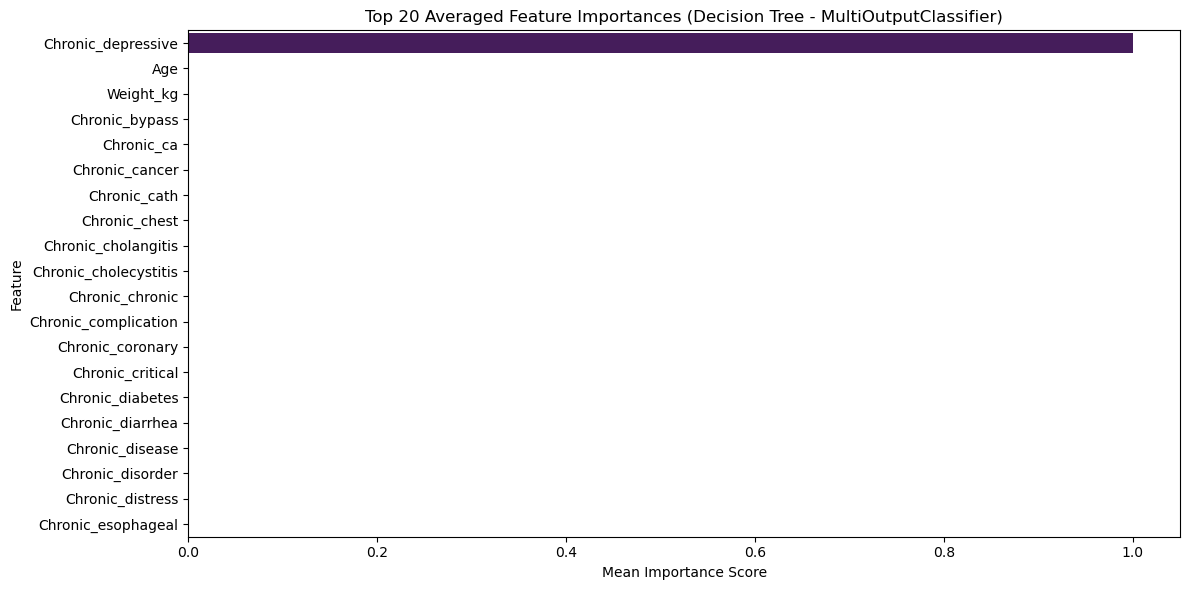

In [153]:
dt_model = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))
dt_model.fit(X_train_balanced, y_train_balanced)

importances = np.array([est.feature_importances_ for est in dt_model.estimators_])

# Average across all output labels (multi-label)
mean_importances = importances.mean(axis=0)

# Convert to Series for plotting
importances_series = pd.Series(mean_importances, index=X_train_processed_df.columns)
top_importances = importances_series.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_importances.values, y=top_importances.index, palette="viridis")
plt.title("Top 20 Averaged Feature Importances (Decision Tree - MultiOutputClassifier)")
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
for label, estimator in zip(y_train_df.columns, dt_model.estimators_):
    plt.figure(figsize=(18, 8))
    plot_tree(estimator, 
              feature_names=X_test_processed_df.columns, 
              class_names=["No", "Yes"], 
              filled=True, 
              max_depth=2, 
              rounded=True)
    plt.title(f"{dt_model} for Label: {label}")
    plt.show()